# Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [2]:
# Import raw data
df = pd.read_csv('t0_repeat2_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,99.051832,103.563047,108.072082,112.576815,117.079374,121.579759,126.075853,130.567658,135.061538,139.549014,...,2472.877365,2476.040621,2479.201030,2482.361832,2485.521408,2488.678140,2491.835266,2494.989551,2498.139382,2501.291225
0,470.0,671.0,830.0,850.0,1104.0,1071.0,1200.0,1261.0,1306.0,1370.0,...,2746.0,2686.0,2716.0,2809.0,2763.0,2944.0,2869.0,2811.0,2886.0,2815.0
1,525.0,687.0,799.0,872.0,968.0,994.0,1063.0,1124.0,1190.0,1349.0,...,2807.0,2763.0,2795.0,2720.0,2690.0,2909.0,2734.0,2947.0,2869.0,2825.0
2,913.0,1098.0,1373.0,1559.0,1567.0,1558.0,1623.0,1697.0,1782.0,1908.0,...,4570.0,4490.0,4410.0,4498.0,4471.0,4485.0,4564.0,4519.0,4754.0,4616.0
3,4138.0,4675.0,4956.0,4800.0,4672.0,4306.0,3960.0,3739.0,3675.0,3533.0,...,2657.0,2655.0,2660.0,2661.0,2669.0,2715.0,2746.0,2638.0,2701.0,2749.0
4,5117.0,5724.0,5741.0,5677.0,5220.0,4920.0,4315.0,4134.0,3924.0,3607.0,...,1314.0,1215.0,1225.0,1202.0,1284.0,1336.0,1261.0,1219.0,1354.0,1305.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,287.0,296.0,385.0,414.0,569.0,515.0,570.0,634.0,682.0,682.0,...,706.0,706.0,651.0,722.0,666.0,740.0,710.0,800.0,790.0,712.0
334,296.0,348.0,479.0,461.0,600.0,562.0,582.0,595.0,679.0,675.0,...,808.0,670.0,691.0,714.0,675.0,771.0,766.0,770.0,782.0,838.0
335,319.0,316.0,398.0,461.0,488.0,558.0,581.0,587.0,692.0,638.0,...,787.0,653.0,700.0,775.0,643.0,715.0,778.0,677.0,733.0,753.0
336,288.0,369.0,486.0,511.0,565.0,575.0,614.0,608.0,623.0,603.0,...,706.0,736.0,657.0,790.0,667.0,777.0,817.0,758.0,820.0,781.0


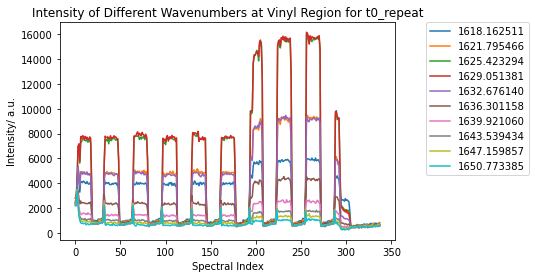

In [3]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region for t0_repeat')
plt.legend(bbox_to_anchor=(1.4,1), borderaxespad=0)
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [4]:
# df.loc[:,'1629.051381'] --> When using loc.
df.columns.get_loc('1629.051381') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label '1629.051381'. Use relevant parameter for iloc and loc respectively.

378

# Filter Relevant Spectra

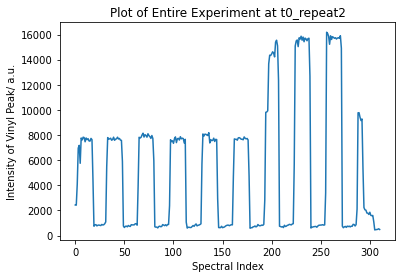

In [7]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:310,'1629.051381'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t0_repeat2')
plt.show()

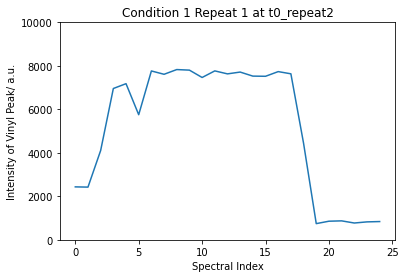

In [13]:
# Condition 
condition1 = df.iloc[:25,:] 
condition1.loc[:,'1629.051381'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 1 at t0_repeat2')
plt.ylim(0,10000) # Zoom in to relevant spectral range.
plt.show()

In [14]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = condition1.loc[11:15, :]
condition1_ss.insert(loc = 0, column = 'Condition', value ='C1_R1')
condition1_ss

,Condition,99.051832,103.563047,108.072082,112.576815,117.079374,121.579759,126.075853,130.567658,135.061538,...,2472.877365,2476.040621,2479.201030,2482.361832,2485.521408,2488.678140,2491.835266,2494.989551,2498.139382,2501.291225
11,C1_R1,6094.0,6899.0,7042.0,6879.0,6169.0,5711.0,5203.0,4757.0,4462.0,...,278.0,141.0,237.0,238.0,132.0,255.0,234.0,216.0,233.0,204.0
12,C1_R1,6236.0,6878.0,6847.0,6818.0,6212.0,5757.0,5141.0,4668.0,4268.0,...,254.0,197.0,191.0,177.0,159.0,210.0,229.0,160.0,249.0,184.0
13,C1_R1,6229.0,6952.0,7040.0,6824.0,6223.0,5603.0,5069.0,4650.0,4385.0,...,266.0,226.0,193.0,261.0,157.0,230.0,241.0,205.0,222.0,190.0
14,C1_R1,6224.0,6740.0,7194.0,6727.0,6171.0,5819.0,5116.0,4672.0,4444.0,...,255.0,225.0,205.0,187.0,201.0,272.0,275.0,190.0,234.0,187.0
15,C1_R1,6120.0,6859.0,7207.0,6755.0,6198.0,5759.0,5195.0,4668.0,4551.0,...,216.0,245.0,208.0,259.0,162.0,270.0,247.0,223.0,206.0,193.0


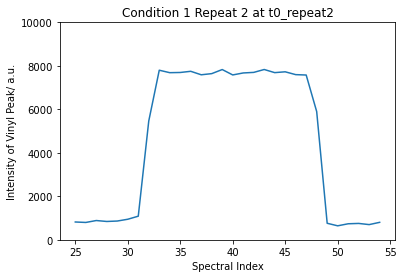

In [17]:
# condition 
condition2 = df.iloc[25:55,:] 
condition2.loc[:,'1629.051381'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 2 at t0_repeat2')
plt.ylim(0,10000) # Zoom in to relevant spectral range.
plt.show()

In [18]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = condition2.loc[41:45, :]
condition2_ss.insert(loc = 0, column = 'Condition', value ='C1_R2')
condition2_ss

,Condition,99.051832,103.563047,108.072082,112.576815,117.079374,121.579759,126.075853,130.567658,135.061538,...,2472.877365,2476.040621,2479.201030,2482.361832,2485.521408,2488.678140,2491.835266,2494.989551,2498.139382,2501.291225
41,C1_R2,6145.0,6907.0,7197.0,6843.0,6028.0,5573.0,5055.0,4566.0,4356.0,...,148.0,158.0,131.0,125.0,70.0,176.0,165.0,107.0,144.0,119.0
42,C1_R2,6507.0,6836.0,7055.0,6764.0,6232.0,5641.0,5246.0,4627.0,4448.0,...,138.0,119.0,113.0,181.0,96.0,189.0,155.0,140.0,138.0,160.0
43,C1_R2,6346.0,7113.0,7155.0,6870.0,6210.0,5660.0,5133.0,4830.0,4378.0,...,187.0,146.0,109.0,150.0,110.0,221.0,204.0,101.0,138.0,158.0
44,C1_R2,6131.0,6863.0,7026.0,6775.0,6351.0,5593.0,4999.0,4644.0,4560.0,...,193.0,113.0,95.0,179.0,126.0,211.0,157.0,169.0,160.0,157.0
45,C1_R2,6205.0,6943.0,6951.0,6786.0,6114.0,5514.0,5047.0,4839.0,4311.0,...,145.0,127.0,113.0,157.0,113.0,203.0,215.0,146.0,178.0,123.0


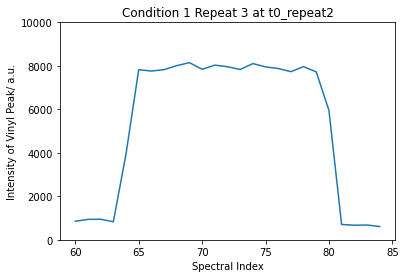

In [21]:
# Condition
condition3 = df.iloc[60:85,:] 
condition3.loc[:,'1629.051381'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 3 at t0_repeat2')
plt.ylim(0,10000) # Zoom in to relevant spectral range.
plt.show()

In [22]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = condition3.loc[72:76, :]
condition3_ss.insert(loc = 0, column = 'Condition', value = 'C1_R3')
condition3_ss

,Condition,99.051832,103.563047,108.072082,112.576815,117.079374,121.579759,126.075853,130.567658,135.061538,...,2472.877365,2476.040621,2479.201030,2482.361832,2485.521408,2488.678140,2491.835266,2494.989551,2498.139382,2501.291225
72,C1_R3,6154.0,6802.0,6856.0,6831.0,6284.0,5616.0,4978.0,4511.0,4389.0,...,103.0,145.0,120.0,209.0,58.0,209.0,149.0,165.0,125.0,144.0
73,C1_R3,6145.0,6869.0,7003.0,6857.0,6205.0,5579.0,5125.0,4531.0,4291.0,...,154.0,119.0,137.0,148.0,119.0,156.0,185.0,147.0,162.0,92.0
74,C1_R3,6210.0,6885.0,7087.0,6756.0,6306.0,5604.0,5239.0,4728.0,4351.0,...,162.0,140.0,111.0,226.0,75.0,190.0,146.0,162.0,103.0,105.0
75,C1_R3,6242.0,6830.0,7146.0,6801.0,6146.0,5729.0,5142.0,4679.0,4246.0,...,172.0,118.0,92.0,125.0,67.0,128.0,163.0,115.0,162.0,99.0
76,C1_R3,6178.0,6972.0,6997.0,6755.0,6356.0,5526.0,5085.0,4583.0,4345.0,...,154.0,92.0,117.0,172.0,118.0,144.0,192.0,93.0,144.0,56.0


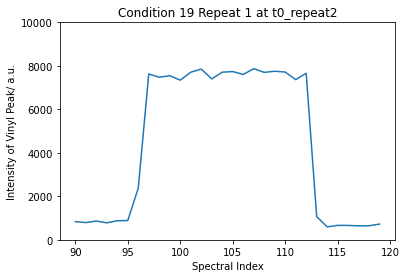

In [23]:
# Condition
condition4 = df.iloc[90:120,:] 
condition4.loc[:,'1629.051381'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 1 at t0_repeat2')
plt.ylim(0,10000) # Zoom in to relevant spectral range.
plt.show()

In [24]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = condition4.loc[106:110, :]
condition4_ss.insert(loc = 0, column = 'Condition', value = 'C19_R1')
condition4_ss

,Condition,99.051832,103.563047,108.072082,112.576815,117.079374,121.579759,126.075853,130.567658,135.061538,...,2472.877365,2476.040621,2479.201030,2482.361832,2485.521408,2488.678140,2491.835266,2494.989551,2498.139382,2501.291225
106,C19_R1,6222.0,6788.0,7041.0,6851.0,6300.0,5753.0,5075.0,4600.0,4071.0,...,142.0,92.0,106.0,129.0,68.0,170.0,155.0,128.0,152.0,97.0
107,C19_R1,6096.0,6990.0,6855.0,6747.0,6123.0,5590.0,5055.0,4717.0,4324.0,...,163.0,110.0,141.0,163.0,95.0,136.0,244.0,125.0,165.0,110.0
108,C19_R1,6114.0,6883.0,6903.0,6698.0,6165.0,5478.0,4986.0,4530.0,4420.0,...,183.0,103.0,133.0,157.0,59.0,103.0,192.0,125.0,121.0,91.0
109,C19_R1,6323.0,7094.0,6844.0,6850.0,6096.0,5816.0,5155.0,4632.0,4297.0,...,172.0,133.0,81.0,164.0,63.0,202.0,186.0,126.0,152.0,178.0
110,C19_R1,6161.0,6946.0,6840.0,6834.0,6272.0,5631.0,4991.0,4718.0,4350.0,...,129.0,111.0,92.0,132.0,64.0,131.0,216.0,114.0,96.0,141.0


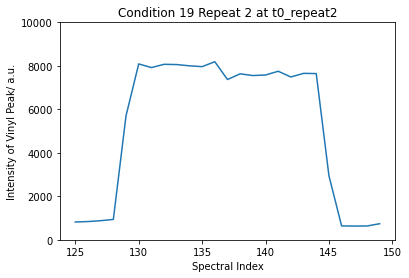

In [27]:
# Condition
condition5 = df.iloc[125:150,:] 
condition5.loc[:,'1629.051381'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 2 at t0_repeat2')
plt.ylim(0,10000) # Zoom in to relevant spectral range.
plt.show()

In [28]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = condition5.loc[137:141, :]
condition5_ss.insert(loc = 0, column = 'Condition', value = 'C19_R2')
condition5_ss

,Condition,99.051832,103.563047,108.072082,112.576815,117.079374,121.579759,126.075853,130.567658,135.061538,...,2472.877365,2476.040621,2479.201030,2482.361832,2485.521408,2488.678140,2491.835266,2494.989551,2498.139382,2501.291225
137,C19_R2,5997.0,6548.0,6644.0,6551.0,6002.0,5390.0,4999.0,4433.0,3923.0,...,273.0,164.0,158.0,246.0,146.0,222.0,229.0,180.0,196.0,233.0
138,C19_R2,6181.0,7010.0,7041.0,6822.0,6152.0,5543.0,5061.0,4575.0,4188.0,...,146.0,109.0,84.0,147.0,82.0,118.0,175.0,84.0,158.0,90.0
139,C19_R2,6311.0,6849.0,6896.0,6771.0,6201.0,5707.0,5082.0,4569.0,4408.0,...,127.0,131.0,110.0,161.0,96.0,198.0,169.0,111.0,122.0,150.0
140,C19_R2,6128.0,6771.0,7032.0,6715.0,6017.0,5693.0,5200.0,4557.0,4264.0,...,145.0,99.0,70.0,134.0,55.0,149.0,150.0,107.0,86.0,118.0
141,C19_R2,6159.0,6887.0,7014.0,6767.0,6165.0,5519.0,5124.0,4572.0,4231.0,...,90.0,94.0,68.0,123.0,92.0,168.0,138.0,115.0,107.0,133.0


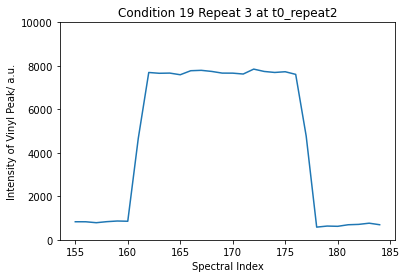

In [32]:
# Condition
condition6 = df.iloc[155:185,:] 
condition6.loc[:,'1629.051381'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 3 at t0_repeat2')
plt.ylim(0,10000) # Zoom in to relevant spectral range.
plt.show()

In [31]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = condition6.loc[171:175, :]
condition6_ss.insert(loc = 0, column = 'Condition', value = 'C19_R3')
condition6_ss

,Condition,99.051832,103.563047,108.072082,112.576815,117.079374,121.579759,126.075853,130.567658,135.061538,...,2472.877365,2476.040621,2479.201030,2482.361832,2485.521408,2488.678140,2491.835266,2494.989551,2498.139382,2501.291225
171,C19_R3,6133.0,6930.0,7201.0,6928.0,6373.0,5615.0,5117.0,4624.0,4355.0,...,95.0,95.0,54.0,134.0,38.0,126.0,151.0,145.0,123.0,70.0
172,C19_R3,6163.0,7117.0,7029.0,6777.0,6217.0,5731.0,5151.0,4706.0,4373.0,...,173.0,82.0,130.0,165.0,66.0,127.0,152.0,103.0,130.0,100.0
173,C19_R3,6129.0,6839.0,7210.0,6809.0,6291.0,5627.0,5155.0,4869.0,4132.0,...,167.0,106.0,129.0,156.0,59.0,203.0,207.0,154.0,192.0,123.0
174,C19_R3,6230.0,6857.0,7039.0,6636.0,6361.0,5695.0,5108.0,4761.0,4402.0,...,136.0,76.0,66.0,146.0,77.0,144.0,150.0,136.0,89.0,130.0
175,C19_R3,6282.0,6744.0,7136.0,6810.0,6234.0,5537.0,5083.0,4668.0,4275.0,...,132.0,139.0,86.0,180.0,76.0,136.0,149.0,128.0,94.0,112.0


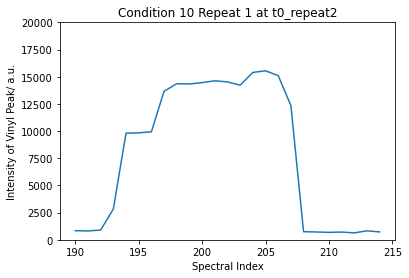

In [38]:
# Condition
condition7 = df.iloc[190:215,:] 
condition7.loc[:,'1629.051381'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 1 at t0_repeat2')
plt.ylim(0,20000) # Zoom in to relevant spectral range.
plt.show()

In [39]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = condition7.loc[198:202, :]
condition7_ss.insert(loc = 0, column = 'Condition', value = 'C10_R1')
condition7_ss

,Condition,99.051832,103.563047,108.072082,112.576815,117.079374,121.579759,126.075853,130.567658,135.061538,...,2472.877365,2476.040621,2479.201030,2482.361832,2485.521408,2488.678140,2491.835266,2494.989551,2498.139382,2501.291225
198,C10_R1,7141.0,8161.0,8648.0,8319.0,7580.0,6962.0,6449.0,5899.0,5387.0,...,178.0,53.0,123.0,159.0,116.0,200.0,215.0,148.0,156.0,125.0
199,C10_R1,7370.0,8113.0,8595.0,8278.0,7657.0,7010.0,6432.0,5896.0,5453.0,...,157.0,165.0,123.0,195.0,59.0,184.0,199.0,119.0,158.0,155.0
200,C10_R1,7353.0,8178.0,8515.0,8231.0,7616.0,6973.0,6262.0,5923.0,5563.0,...,176.0,131.0,128.0,215.0,115.0,171.0,161.0,79.0,135.0,161.0
201,C10_R1,7338.0,8372.0,8421.0,8307.0,7529.0,7148.0,6376.0,5967.0,5574.0,...,193.0,125.0,90.0,147.0,131.0,205.0,187.0,127.0,186.0,134.0
202,C10_R1,7349.0,8281.0,8650.0,8148.0,7845.0,7125.0,6281.0,5879.0,5385.0,...,168.0,88.0,118.0,143.0,95.0,155.0,150.0,143.0,151.0,106.0


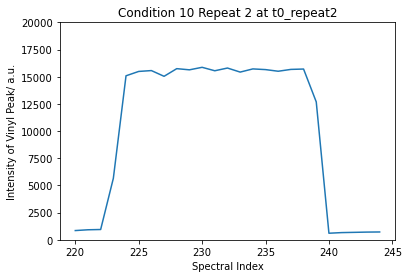

In [41]:
# Condition
condition8 = df.iloc[220:245,:] 
condition8.loc[:,'1629.051381'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 2 at t0_repeat2')
plt.ylim(0,20000) # Zoom in to relevant spectral range.
plt.show()

In [42]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = condition8.loc[232:236, :]
condition8_ss.insert(loc = 0, column = 'Condition', value = 'C10_R2')
condition8_ss

,Condition,99.051832,103.563047,108.072082,112.576815,117.079374,121.579759,126.075853,130.567658,135.061538,...,2472.877365,2476.040621,2479.201030,2482.361832,2485.521408,2488.678140,2491.835266,2494.989551,2498.139382,2501.291225
232,C10_R2,7431.0,8318.0,8765.0,8487.0,7970.0,7156.0,6804.0,6005.0,5717.0,...,158.0,133.0,87.0,166.0,87.0,169.0,177.0,147.0,165.0,113.0
233,C10_R2,7360.0,8416.0,8723.0,8447.0,7940.0,7255.0,6708.0,6118.0,5734.0,...,191.0,117.0,85.0,165.0,74.0,170.0,137.0,127.0,149.0,136.0
234,C10_R2,7431.0,8390.0,8720.0,8483.0,7794.0,7277.0,6622.0,6101.0,5755.0,...,161.0,99.0,148.0,155.0,49.0,176.0,177.0,161.0,145.0,122.0
235,C10_R2,7552.0,8466.0,8720.0,8503.0,8024.0,7316.0,6574.0,6208.0,5707.0,...,127.0,64.0,91.0,173.0,81.0,197.0,118.0,151.0,162.0,144.0
236,C10_R2,7636.0,8375.0,8627.0,8525.0,7784.0,7309.0,6550.0,6060.0,5782.0,...,166.0,145.0,94.0,156.0,85.0,186.0,175.0,142.0,136.0,92.0


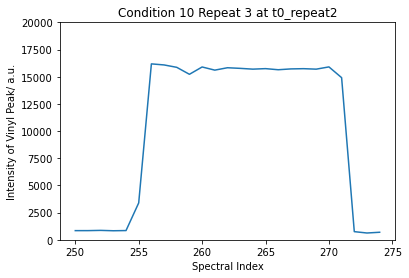

In [44]:
# Condition
condition9 = df.iloc[250:275,:] 
condition9.loc[:,'1629.051381'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 3 at t0_repeat2')
plt.ylim(0,20000) # Zoom in to relevant spectral range.
plt.show()

In [45]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = condition9.loc[265:269, :]
condition9_ss.insert(loc = 0, column = 'Condition', value = 'C10_R3')
condition9_ss

,Condition,99.051832,103.563047,108.072082,112.576815,117.079374,121.579759,126.075853,130.567658,135.061538,...,2472.877365,2476.040621,2479.201030,2482.361832,2485.521408,2488.678140,2491.835266,2494.989551,2498.139382,2501.291225
265,C10_R3,7468.0,8402.0,8811.0,8399.0,7921.0,7239.0,6553.0,6114.0,5808.0,...,186.0,165.0,120.0,149.0,57.0,168.0,201.0,118.0,107.0,149.0
266,C10_R3,7451.0,8350.0,8769.0,8546.0,8020.0,7200.0,6700.0,5990.0,5607.0,...,95.0,114.0,62.0,161.0,63.0,165.0,143.0,90.0,120.0,99.0
267,C10_R3,7652.0,8708.0,8964.0,8457.0,7977.0,7190.0,6596.0,6169.0,5727.0,...,106.0,129.0,69.0,183.0,66.0,198.0,190.0,123.0,139.0,140.0
268,C10_R3,7597.0,8601.0,8876.0,8719.0,8034.0,7505.0,6621.0,6206.0,5687.0,...,155.0,96.0,119.0,147.0,104.0,81.0,148.0,86.0,171.0,97.0
269,C10_R3,7455.0,8447.0,8701.0,8788.0,7683.0,7303.0,6671.0,6009.0,5728.0,...,140.0,88.0,96.0,147.0,120.0,158.0,165.0,155.0,156.0,150.0


In [46]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                 condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,99.051832,103.563047,108.072082,112.576815,117.079374,121.579759,126.075853,130.567658,135.061538,...,2472.877365,2476.040621,2479.201030,2482.361832,2485.521408,2488.678140,2491.835266,2494.989551,2498.139382,2501.291225
11,C1_R1,6094.0,6899.0,7042.0,6879.0,6169.0,5711.0,5203.0,4757.0,4462.0,...,278.0,141.0,237.0,238.0,132.0,255.0,234.0,216.0,233.0,204.0
12,C1_R1,6236.0,6878.0,6847.0,6818.0,6212.0,5757.0,5141.0,4668.0,4268.0,...,254.0,197.0,191.0,177.0,159.0,210.0,229.0,160.0,249.0,184.0
13,C1_R1,6229.0,6952.0,7040.0,6824.0,6223.0,5603.0,5069.0,4650.0,4385.0,...,266.0,226.0,193.0,261.0,157.0,230.0,241.0,205.0,222.0,190.0
14,C1_R1,6224.0,6740.0,7194.0,6727.0,6171.0,5819.0,5116.0,4672.0,4444.0,...,255.0,225.0,205.0,187.0,201.0,272.0,275.0,190.0,234.0,187.0
15,C1_R1,6120.0,6859.0,7207.0,6755.0,6198.0,5759.0,5195.0,4668.0,4551.0,...,216.0,245.0,208.0,259.0,162.0,270.0,247.0,223.0,206.0,193.0
41,C1_R2,6145.0,6907.0,7197.0,6843.0,6028.0,5573.0,5055.0,4566.0,4356.0,...,148.0,158.0,131.0,125.0,70.0,176.0,165.0,107.0,144.0,119.0
42,C1_R2,6507.0,6836.0,7055.0,6764.0,6232.0,5641.0,5246.0,4627.0,4448.0,...,138.0,119.0,113.0,181.0,96.0,189.0,155.0,140.0,138.0,160.0
43,C1_R2,6346.0,7113.0,7155.0,6870.0,6210.0,5660.0,5133.0,4830.0,4378.0,...,187.0,146.0,109.0,150.0,110.0,221.0,204.0,101.0,138.0,158.0
44,C1_R2,6131.0,6863.0,7026.0,6775.0,6351.0,5593.0,4999.0,4644.0,4560.0,...,193.0,113.0,95.0,179.0,126.0,211.0,157.0,169.0,160.0,157.0
45,C1_R2,6205.0,6943.0,6951.0,6786.0,6114.0,5514.0,5047.0,4839.0,4311.0,...,145.0,127.0,113.0,157.0,113.0,203.0,215.0,146.0,178.0,123.0


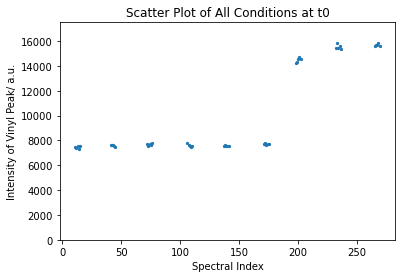

In [48]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions at t0')
plt.ylim(0, 17500)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [49]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [50]:
# Inspect df_.
df_

,Condition,99.051832,103.563047,108.072082,112.576815,117.079374,121.579759,126.075853,130.567658,135.061538,...,2472.877365,2476.040621,2479.201030,2482.361832,2485.521408,2488.678140,2491.835266,2494.989551,2498.139382,2501.291225
11,C1_R1,6094.0,6899.0,7042.0,6879.0,6169.0,5711.0,5203.0,4757.0,4462.0,...,278.0,141.0,237.0,238.0,132.0,255.0,234.0,216.0,233.0,204.0
12,C1_R1,6236.0,6878.0,6847.0,6818.0,6212.0,5757.0,5141.0,4668.0,4268.0,...,254.0,197.0,191.0,177.0,159.0,210.0,229.0,160.0,249.0,184.0
13,C1_R1,6229.0,6952.0,7040.0,6824.0,6223.0,5603.0,5069.0,4650.0,4385.0,...,266.0,226.0,193.0,261.0,157.0,230.0,241.0,205.0,222.0,190.0
14,C1_R1,6224.0,6740.0,7194.0,6727.0,6171.0,5819.0,5116.0,4672.0,4444.0,...,255.0,225.0,205.0,187.0,201.0,272.0,275.0,190.0,234.0,187.0
15,C1_R1,6120.0,6859.0,7207.0,6755.0,6198.0,5759.0,5195.0,4668.0,4551.0,...,216.0,245.0,208.0,259.0,162.0,270.0,247.0,223.0,206.0,193.0
41,C1_R2,6145.0,6907.0,7197.0,6843.0,6028.0,5573.0,5055.0,4566.0,4356.0,...,148.0,158.0,131.0,125.0,70.0,176.0,165.0,107.0,144.0,119.0
42,C1_R2,6507.0,6836.0,7055.0,6764.0,6232.0,5641.0,5246.0,4627.0,4448.0,...,138.0,119.0,113.0,181.0,96.0,189.0,155.0,140.0,138.0,160.0
43,C1_R2,6346.0,7113.0,7155.0,6870.0,6210.0,5660.0,5133.0,4830.0,4378.0,...,187.0,146.0,109.0,150.0,110.0,221.0,204.0,101.0,138.0,158.0
44,C1_R2,6131.0,6863.0,7026.0,6775.0,6351.0,5593.0,4999.0,4644.0,4560.0,...,193.0,113.0,95.0,179.0,126.0,211.0,157.0,169.0,160.0,157.0
45,C1_R2,6205.0,6943.0,6951.0,6786.0,6114.0,5514.0,5047.0,4839.0,4311.0,...,145.0,127.0,113.0,157.0,113.0,203.0,215.0,146.0,178.0,123.0


In [51]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1629.051381']].groupby('Condition').describe()

1629.051381                                                  \
                count     mean         std      min      25%      50%   
Condition                                                               
C10_R1            5.0  14459.2  120.512240  14334.0  14356.0  14458.0   
C10_R2            5.0  15620.4  153.265456  15426.0  15504.0  15655.0   
C10_R3            5.0  15708.0   41.593269  15642.0  15696.0  15718.0   
C19_R1            5.0   7728.0   96.247078   7604.0   7699.0   7716.0   
C19_R2            5.0   7577.8  137.810377   7372.0   7554.0   7579.0   
C19_R3            5.0   7728.2   82.037796   7624.0   7696.0   7729.0   
C1_R1             5.0   7632.2  110.205263   7520.0   7528.0   7631.0   
C1_R2             5.0   7723.6   63.618394   7673.0   7688.0   7699.0   
C1_R3             5.0   7945.2  103.637348   7832.0   7877.0   7953.0   

                             
               75%      max  
Condition                    
C10_R1     14522.0  14626.0  
C10_R2     15718.0  15799.0  
C10_R3     15740.0  15744.0  
C19_R1      7751.0   7870.0  
C19_R2      7633.0   7751.0  
C19_R3      7742.0   7850.0  
C1_R1       7714.0   7768.0  
C1_R2       7726.0   7832.0  
C1_R3       7960.0   8104.0

In [52]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\210224 High Throughput Experiment Conditions 1, 19 and 10 Repeat\Raman\df_t0_repeat2.csv')